<a href="https://colab.research.google.com/github/ecanaan16/data_bowl/blob/week3/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                           time      x      y  speed  acceleration  dis  \
91938  2018-11-04T18:14:17.099Z  39.43  34.96    0.0           0.0  0.0   
91983  2018-11-04T18:14:17.200Z  39.43  34.96    0.0           0.0  0.0   
92028  2018-11-04T18:14:17.299Z  39.43  34.96    0.0           0.0  0.0   
92073  2018-11-04T18:14:17.400Z  39.43  34.96    0.0           0.0  0.0   
92118  2018-11-04T18:14:17.500Z  39.43  34.96    0.0           0.0  0.0   

           o     dir event      nflId   displayName  jerseyNumber position  \
91938  99.59  345.12   NaN  2532884.0  Marvin Jones          11.0       WR   
91983  99.59  342.37   NaN  2532884.0  Marvin Jones          11.0       WR   
92028  99.59  337.95   NaN  2532884.0  Marvin Jones          11.0       WR   
92073  99.59  338.55   NaN  2532884.0  Marvin Jones          11.0       WR   
92118  99.59  344.57   NaN  2532884.0  Marvin Jones          11.0       WR   

       frame  team      gameId  playId playDirection  route  
91938      1  away

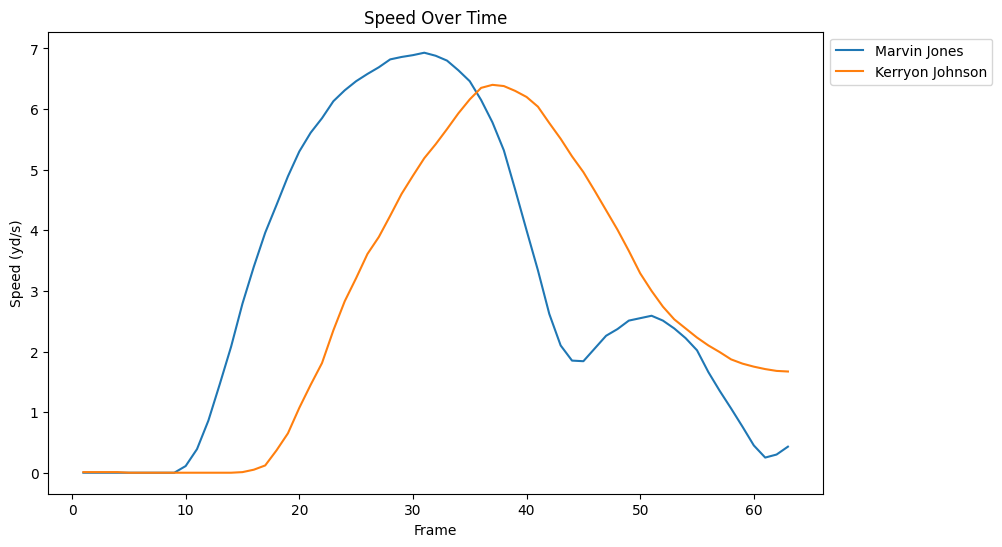

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

week9 = pd.read_csv("week9.csv")
player1 = week9[(week9["jerseyNumber"] == 11) &
                (week9["gameId"] == 2018110405) &
                (week9["playId"] == 344)].copy()

player2 = week9[(week9["jerseyNumber"] == 33) &
                (week9["gameId"] == 2018110405) &
                (week9["playId"] == 344)].copy()

player1.rename(columns={'frameId':'frame','s':'speed','a':'acceleration'}, inplace=True)
player2.rename(columns={'frameId':'frame','s':'speed','a':'acceleration'}, inplace=True)

print(player1.head())
print(player2.head())



#create line graph with axes
#x represents time
#y represents speed (delta d/ delta t)

plt.figure(figsize=(10,6))


plabel1 = player1["displayName"].iloc[0]
plabel2 = player2["displayName"].iloc[0]
plt.plot(player1['frame'], player1['speed'],label = plabel1)
plt.plot(player2['frame'], player2['speed'],label = plabel2)



plt.title('Speed Over Time')
plt.xlabel('Frame')
plt.ylabel('Speed (yd/s)')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.show()


In [18]:
wr = week9[(week9["gameId"] == 2018110405) &
           (week9["playId"] == 344) &
           (week9["jerseyNumber"] == 11)]

start = wr.iloc[0][['x','y']].values
end = wr.iloc[-1][['x','y']].values

straight_dist = np.linalg.norm(end - start)

actual_dist = wr["dis"].sum()

if actual_dist > 0:
  route_eff = straight_dist/actual_dist
  print(f"Route Efficiency: {route_eff}")

Route Efficiency: 0.6986175640464222
